In [1]:
from asgardpy.analysis import AsgardpyAnalysis
from asgardpy.config import AsgardpyConfig
from gammapy.modeling.models import Models, PowerLawSpectralModel

import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
import logging

In [2]:
from asgardpy.data.dataset_3d import Dataset3DGeneration

In [3]:
log = logging.getLogger("test 3d dataset")

In [4]:
base_dir = "/fefs/aswg/workspace/chaitanya.priyadarshi/"
config_file = base_dir + "analyze_crab_test_Nov2020.yaml"

In [5]:
config = AsgardpyConfig()

In [6]:
%%time
config_main = config.read(config_file)

CPU times: user 50.1 ms, sys: 2.97 ms, total: 53.1 ms
Wall time: 50.7 ms


In [7]:
for g in config_main.general:
    print(g)

('log', LogConfig(level='info', filename=None, filemode=None, format=None, datefmt=None))
('outdir', '/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/')
('n_jobs', 1)
('steps', [<AnalysisStepEnum.datasets_3d: 'datasets-3d'>, <AnalysisStepEnum.datasets_1d: 'datasets-1d'>, <AnalysisStepEnum.fit: 'fit'>, <AnalysisStepEnum.flux_points: 'flux-points'>])
('overwrite', True)
('stacked_dataset', True)


# Steps mentioned in the main config file

In [8]:
config_main.general.steps

[<AnalysisStepEnum.datasets_3d: 'datasets-3d'>,
 <AnalysisStepEnum.datasets_1d: 'datasets-1d'>,
 <AnalysisStepEnum.fit: 'fit'>,
 <AnalysisStepEnum.flux_points: 'flux-points'>]

# Target source information

In [9]:
for c in config_main.target:
    print(c)

('source_name', 'Crab')
('sky_position', SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 83.63308333 deg>, lat=<Angle 22.0145 deg>))
('use_uniform_position', True)
('models_file', None)
('extended', False)
('components', SkyModelComponent(name='Crab', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-06, unit='cm-2 s-1 TeV-1', error=1.5e-07, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.1, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=2.0, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.01, unit='', error=0.001, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.0, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(name=None, value=

# 3D Datasets informations

In [10]:
for cc in config_main.dataset3d:
    print(cc)

('type', <ReductionTypeEnum.cube: '3d'>)
('instruments', [Dataset3DBaseConfig(name='Fermi-LAT', io=[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})], dataset_info=Dataset3DInfoConfig(name='Fermi-LAT', key=['FRONT', 'BACK'], map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>], obs_time=TimeIntervalsConfig(format=<TimeForm

In [11]:
for cc in config_main.fit_params:
    print(cc)

('fit_range', EnergyRangeConfig(min=<Quantity 1. GeV>, max=<Quantity 40. TeV>))
('backend', <BackendEnum.minuit: 'minuit'>)
('optimize_opts', {})
('covariance_opts', {})
('confidence_opts', {})
('store_trace', True)


In [12]:
%%time
analysis = AsgardpyAnalysis(config_main)

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


CPU times: user 1.16 ms, sys: 176 µs, total: 1.34 ms
Wall time: 1.21 ms


In [13]:
analysis

# Prepare for a single 3D Dataset, based on instrument and key_name

In [14]:
instruments_list = config_main.dataset3d.instruments
print(len(instruments_list), "number of 3D dataset information provided")

config_3d_dataset = instruments_list[0]
print(f"Instrument selected is {config_3d_dataset.name}")

1 number of 3D dataset information provided
Instrument selected is Fermi-LAT


In [15]:
key_names = config_3d_dataset.dataset_info.key
print(f"The list of different keys or modes of observations for the selected instrument are {key_names}")

The list of different keys or modes of observations for the selected instrument are ['FRONT', 'BACK']


# Run each Dataset3DGeneration step

In [16]:
%%time
generate_3d_dataset = Dataset3DGeneration(
    log, config_3d_dataset, config_main, key_names[0]
)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 29.3 µs


## Initialized variables

In [17]:
print(generate_3d_dataset.instrument_name)

Fermi-LAT


In [18]:
print(generate_3d_dataset.config_3d_dataset_io)

[InputConfig(type='lat', input_dir=PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020'), glob_pattern={'events': '*MkTime.fits*', 'edisp': '*eDRM.fits*', 'xml_model': '*out.xml', 'exposure': '*BinnedMap.fits*', 'psf': '*psf.fits*'}), InputConfig(type='lat-aux', input_dir=PosixPath('/fefs/aswg/workspace/lst1-agn-paper/LAT/diffuse_models'), glob_pattern={'diffuse': 'gll_iem_v07.fits*', 'iso': 'iso_P8R3_SOURCE_V3_*.txt'})]


In [19]:
print(generate_3d_dataset.config_3d_dataset_info)

name='Fermi-LAT' key=['FRONT', 'BACK'] map_selection=[<MapSelectionEnum.counts: 'counts'>, <MapSelectionEnum.exposure: 'exposure'>, <MapSelectionEnum.background: 'background'>, <MapSelectionEnum.psf: 'psf'>, <MapSelectionEnum.edisp: 'edisp'>] obs_time=TimeIntervalsConfig(format=<TimeFormatEnum.iso: 'iso'>, intervals=[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2020-11-16 00:00:00.000>, stop=<Time object: scale='utc' format='iso' value=2020-11-23 00:00:00.000>)]) background=BackgroundConfig(method=None, region_finder_method=None, parameters={}, exclusion=ExclusionRegionsConfig(target_source=True, regions=[RegionsConfig(type='CircleAnnulusSkyRegion', name='None', position=SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 83.63308333 deg>, lat=<Angle 22.0145 deg>), parameters={'rad_0': '8 deg', 'rad_1': '30 deg'}), RegionsConfig(type='CircleSkyRegion', name='RGB J0521+212', position=SkyCoordConfig(frame=None, lon=None, lat=None), parameters={'region_radius':

In [20]:
print(generate_3d_dataset.key_name)

FRONT


In [21]:
print(generate_3d_dataset.config_target)

source_name='Crab' sky_position=SkyCoordConfig(frame=<FrameEnum.icrs: 'icrs'>, lon=<Angle 83.63308333 deg>, lat=<Angle 22.0145 deg>) use_uniform_position=True models_file=None extended=False components=SkyModelComponent(name='Crab', type='SkyModel', spectral=SpectralModelConfig(model_name='LogParabola', type='LogParabolaSpectralModel', parameters=[ModelParams(name='amplitude', value=1e-06, unit='cm-2 s-1 TeV-1', error=1.5e-07, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.1, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=2.0, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.01, unit='', error=0.001, min=1e-06, max=1.0, frozen=False)], ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.0, alpha_norm=1.0)), spatial=SpatialModelConfig(model_name=None, type=None, parameters=[ModelParams(name=None, value=None, unit=None, error=None, 

In [22]:
print(generate_3d_dataset.model)

model_name='LogParabola' type='LogParabolaSpectralModel' parameters=[ModelParams(name='amplitude', value=1e-06, unit='cm-2 s-1 TeV-1', error=1.5e-07, min=1e-13, max=0.01, frozen=False), ModelParams(name='reference', value=0.1, unit='TeV', error=0.0, min=0.0001, max=100.0, frozen=True), ModelParams(name='alpha', value=2.0, unit='', error=0.1, min=0.5, max=5.0, frozen=False), ModelParams(name='beta', value=0.01, unit='', error=0.001, min=1e-06, max=1.0, frozen=False)] ebl_abs=EBLAbsorptionModel(model_name='dominguez', type='EBLAbsorptionNormSpectralModel', redshift=0.0, alpha_norm=1.0)


In [23]:
print(generate_3d_dataset.exclusion_regions, generate_3d_dataset.target_full_model)

[] None


### First check for the given file list if they are readable or not.

In [24]:
%%time
file_list = generate_3d_dataset.read_to_objects(
    generate_3d_dataset.model, 
    generate_3d_dataset.key_name
)

The list of DL3 event files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_MkTime.fits')]
The list of Detector Response Matrix files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits')]
The list of XML files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LogParabola_LAT_Analysis_out.xml')]
The list of Exposure Map files for LAT selected: [PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/

CPU times: user 1.36 s, sys: 1.51 s, total: 2.86 s
Wall time: 2.88 s


In [25]:
print(file_list)

{'xml_file': PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LogParabola_LAT_Analysis_out.xml'), 'events_file': PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_MkTime.fits'), 'edrm_file': PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits'), 'expmap_file': PosixPath('/fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov

In [26]:
for k in file_list.keys():
    print(k, file_list[k])

xml_file /fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LogParabola_LAT_Analysis_out.xml
events_file /fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_MkTime.fits
edrm_file /fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits
expmap_file /fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_BinnedMap.fits
psf_file /fefs/asw

In [27]:
print(generate_3d_dataset.exposure)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (212, 212, 47)
	ndim  : 3
	unit  : cm2 s
	dtype : >f4



In [28]:
print(generate_3d_dataset.psf)

RegionNDMap

	geom  : RegionGeom 
 	axes  : ['lon', 'lat', 'rad', 'energy_true']
	shape : (1, 1, 300, 46)
	ndim  : 4
	unit  : 1 / sr
	dtype : >f8



In [29]:
print(generate_3d_dataset.drmap.info())

Filename: /fefs/aswg/workspace/chaitanya.priyadarshi/real_data/AGN/Crab/v09x/tailcut84/DL3/interp_irf_en_dep/nsb_tuning/geff_70/teff_70/20220518_dec2276/perf_paper/interp_w_23/joint_lat_lst/LAT/Nov2020/Crab_LAT_Analysis_FRONTBACK_LogParabola_eDRM.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   (1, 1, 1)   float32   
  1  GTI           1 BinTableHDU     33   108R x 2C   [D, D]   
  2  EBOUNDS       1 BinTableHDU     38   212R x 3C   [I, 1E, 1E]   
  3  DRM           1 BinTableHDU     29   46R x 6C   [D, D, I, PI(1), PI(1), PE(46)]   
None


In [30]:
print(generate_3d_dataset.diff_gal)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (2880, 1441, 28)
	ndim  : 3
	unit  : 1 / (cm2 MeV s sr)
	dtype : >f4



In [31]:
print(generate_3d_dataset.diff_iso)

SkyModel

  Name                      : fermi-diffuse-iso-FRONT
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : ConstantSpatialModel
  Temporal model type       : 
  Parameters:
    norm                  (frozen):      1.000                   
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         
    value                 (frozen):      1.000       1 / sr      




In [32]:
print(len(generate_3d_dataset.list_sources), "number of sources read from XML file")

14 number of sources read from XML file


In [33]:
for src in generate_3d_dataset.list_sources:
    print(src)

SkyModel

  Name                      : Crab
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (cm2 s TeV)
    reference             (frozen):      0.100       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         


SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type 

In [34]:
print("Number of free parameters in the whole list of SkyModels:", len(Models(generate_3d_dataset.list_sources).parameters.free_parameters))

Number of free parameters in the whole list of SkyModels: 13


In [35]:
print("Names of the sources in the whole list of SkyModels:", Models(generate_3d_dataset.list_sources).names)

Names of the sources in the whole list of SkyModels: ['Crab', '4FGL J0515.8+1527', '4FGL J0521.7+2112', '4FGL J0524.5+2839', '4FGL J0540.3+2756e', '4FGL J0554.1+3107', '4FGL J0601.4+2320', '4FGL J0609.0+2006', '4FGL J0613.1+1749c', '4FGL J0615.9+1416', '4FGL J0617.2+2234e', '4FGL J0634.2+0436e', 'diffuse-iem', 'fermi-diffuse-iso-FRONT']


In [36]:
print("The SkyModel of the target source is\n", generate_3d_dataset.target_full_model)

The SkyModel of the target source is
 SkyModel

  Name                      : Crab
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (cm2 s TeV)
    reference             (frozen):      0.100       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         




### Start preparing objects to create the counts map

In [37]:
%%time
generate_3d_dataset.set_energy_dispersion_matrix()

CPU times: user 6.13 ms, sys: 3.12 ms, total: 9.25 ms
Wall time: 8.31 ms


EDispKernel
-----------

  axes  : ['energy_true', 'energy']
  shape : (46, 46)
  ndim  : 2
  unit  : 
  dtype : float32

MapAxis

	name       : energy    
	unit       : 'MeV'     
	nbins      : 46        
	node type  : edges     
	edges min  : 5.0e+01 MeV
	edges max  : 2.0e+06 MeV
	interp     : log       
 MapAxis

	name       : energy_true
	unit       : 'MeV'     
	nbins      : 46        
	node type  : edges     
	edges min  : 5.0e+01 MeV
	edges max  : 2.0e+06 MeV
	interp     : log       



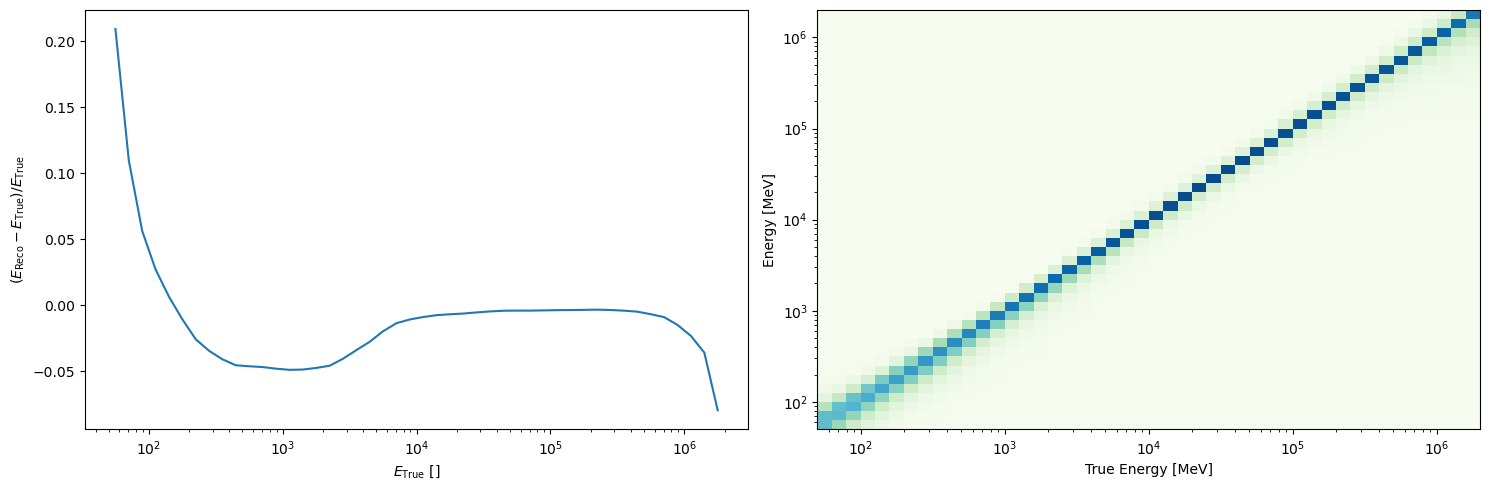

In [38]:
print(generate_3d_dataset.edisp_kernel)
print(generate_3d_dataset.energy_axis, generate_3d_dataset.energy_axis_true)
generate_3d_dataset.edisp_kernel.peek()

In [39]:
%%time
generate_3d_dataset.load_events(file_list["events_file"])

CPU times: user 55.4 ms, sys: 11.2 ms, total: 66.5 ms
Wall time: 60.7 ms


### EventList and GTI

In [40]:
# Time interval to select events
print(generate_3d_dataset.config_3d_dataset_info.obs_time.intervals)

[TimeRangeConfig(start=<Time object: scale='utc' format='iso' value=2020-11-16 00:00:00.000>, stop=<Time object: scale='utc' format='iso' value=2020-11-23 00:00:00.000>)]


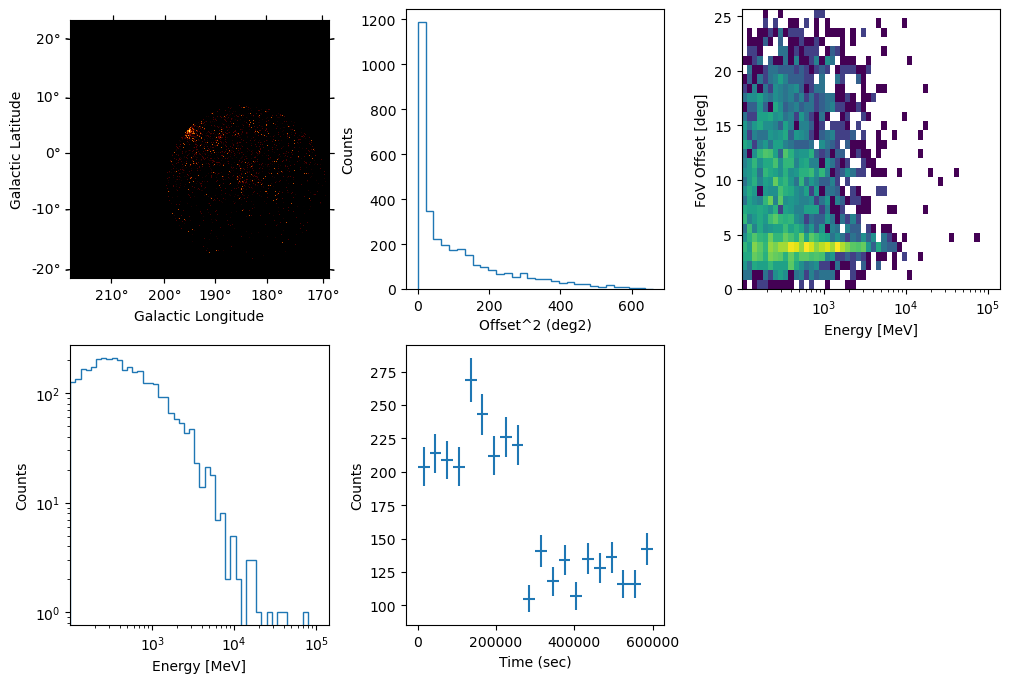

In [41]:
generate_3d_dataset.events.peek()

In [42]:
print(generate_3d_dataset.gti)

GTI info:
- Number of GTIs: 108
- Duration: 507682.2195611 s
- Start: 627177605.0000001 s MET
- Start: 2020-11-16T00:01:09.184 (time standard: TT)
- Stop: 627782401.0 s MET
- Stop: 2020-11-23T00:01:05.184 (time standard: TT)



In [43]:
%%time
# Source position from the Events file
generate_3d_dataset.get_source_skycoord()
print(generate_3d_dataset.source_pos)

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (83.633, 22.013)>
CPU times: user 7.86 ms, sys: 1.87 ms, total: 9.73 ms
Wall time: 8.67 ms


## Create the Counts Map

In [44]:
%%time
generate_3d_dataset._counts_map()

CPU times: user 126 ms, sys: 6.09 ms, total: 132 ms
Wall time: 130 ms


In [45]:
generate_3d_dataset.counts_map

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (212, 212, 46)
	ndim  : 3
	unit  : 
	dtype : float64

In [46]:
generate_3d_dataset.counts_map.plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

### Exclusion mask

In [47]:
%%time
generate_3d_dataset._create_exclusion_mask()

Using the background region from config for exclusion mask


CPU times: user 962 ms, sys: 292 ms, total: 1.25 s
Wall time: 1.18 s


In [48]:
print(generate_3d_dataset.exclusion_mask)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy']
	shape : (212, 212, 46)
	ndim  : 3
	unit  : 
	dtype : bool



In [49]:
print(generate_3d_dataset.exclusion_regions)

[<CircleAnnulusSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (83.63308333, 22.0145)>, inner_radius=8.0 deg, outer_radius=30.0 deg)>, <CircleSkyRegion(center=<SkyCoord (ICRS): (ra, dec) in deg
    (80.44152354, 21.21429298)>, radius=0.5 deg)>]


In [50]:
generate_3d_dataset.exclusion_mask.plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

### IRF interpolators

In [51]:
%%time
generate_3d_dataset._set_edisp_interpolator()

CPU times: user 5.24 ms, sys: 12.8 ms, total: 18 ms
Wall time: 5.42 ms


EDispKernel
-----------

  axes  : ['energy_true', 'energy']
  shape : (46, 46)
  ndim  : 2
  unit  : 
  dtype : float64



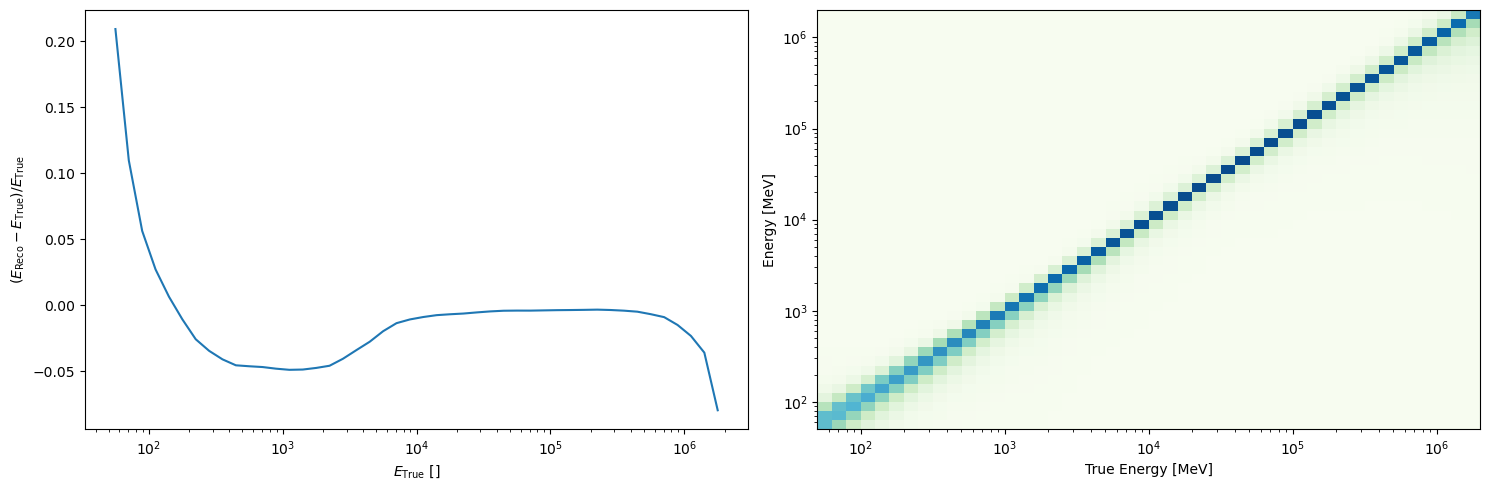

In [52]:
print(generate_3d_dataset.edisp_interp_kernel)
generate_3d_dataset.edisp_interp_kernel.peek()

In [53]:
%%time
generate_3d_dataset._set_exposure_interpolator()

CPU times: user 2.27 s, sys: 209 ms, total: 2.48 s
Wall time: 2.47 s


In [54]:
print(generate_3d_dataset.exposure_interp)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (212, 212, 46)
	ndim  : 3
	unit  : cm2 s
	dtype : float64



### Diffuse background cutout

In [55]:
%%time
generate_3d_dataset._generate_diffuse_background_cutout()

CPU times: user 240 ms, sys: 737 ms, total: 978 ms
Wall time: 973 ms


In [56]:
print(Models(generate_3d_dataset.list_sources)["diffuse-iem"])

SkyModel

  Name                      : diffuse-iem
  Datasets names            : None
  Spectral model type       : PowerLawNormSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         




In [57]:
print(generate_3d_dataset.diff_gal_cutout)

SkyModel

  Name                      : diffuse-iem
  Datasets names            : None
  Spectral model type       : PowerLawNormSpectralModel
  Spatial  model type       : TemplateSpatialModel
  Temporal model type       : 
  Parameters:
    norm                          :      1.000   +/-    0.00             
    tilt                  (frozen):      0.000                   
    reference             (frozen):      1.000       TeV         




In [58]:
print(generate_3d_dataset.diffuse_cutout)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat', 'energy_true']
	shape : (121, 170, 28)
	ndim  : 3
	unit  : 1 / (cm2 MeV s sr)
	dtype : >f4



### Produce MapDataset

In [59]:
%%time
dataset = generate_3d_dataset.generate_dataset()

Using the exclusion mask to create a safe mask
CPU times: user 7.01 ms, sys: 3 ms, total: 10 ms
Wall time: 8.63 ms


In [60]:
print(dataset)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : nan
  Predicted background counts     : nan
  Predicted excess counts         : nan

  Exposure min                    : 2.80e+06 cm2 s
  Exposure max                    : 3.61e+08 cm2 s

  Number of total bins            : 2067424 
  Number of fit bins              : 921334 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : nan

  Number of models                : 0 
  Number of parameters            : 0
  Number of free parameters       : 0




In [61]:
for m in generate_3d_dataset.list_sources:
    print(m)

SkyModel

  Name                      : Crab
  Datasets names            : None
  Spectral model type       : CompoundSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   1.00e-06   +/- 1.5e-07 1 / (cm2 s TeV)
    reference             (frozen):      0.100       TeV         
    alpha                         :      2.000   +/-    0.10             
    beta                          :      0.010   +/-    0.00             
    alpha_norm            (frozen):      1.000                   
    redshift              (frozen):      0.000                   
    lon_0                 (frozen):      3.221       rad         
    lat_0                 (frozen):     -0.101       rad         


SkyModel

  Name                      : 4FGL J0515.8+1527
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type 

# Assigning models to the dataset

In [62]:
%%time
dataset.models = generate_3d_dataset.list_sources

CPU times: user 2.69 ms, sys: 0 ns, total: 2.69 ms
Wall time: 2.64 ms


In [63]:
%%time
print(dataset)

MapDataset
----------

  Name                            : Fermi-LAT_FRONT 

  Total counts                    : 907 
  Total background counts         : nan
  Total excess counts             : nan

  Predicted counts                : 8577.79
  Predicted background counts     : nan
  Predicted excess counts         : 8577.79

  Exposure min                    : 2.80e+06 cm2 s
  Exposure max                    : 3.61e+08 cm2 s

  Number of total bins            : 2067424 
  Number of fit bins              : 921334 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : 25213.38

  Number of models                : 14 
  Number of parameters            : 77
  Number of free parameters       : 13

  Component 0: SkyModel
  
    Name                      : Crab
    Datasets names            : None
    Spectral model type       : CompoundSpectralModel
    Spatial  model type       : PointSpatialModel
    Temporal model type       : 
    Parameters:
      amplitude    

# Some basic plots from the Dataset

In [64]:
dataset.mask_safe.plot_interactive()

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy:', layout=Layout(wid…

Text(0.5, 1.0, 'CountsMap')

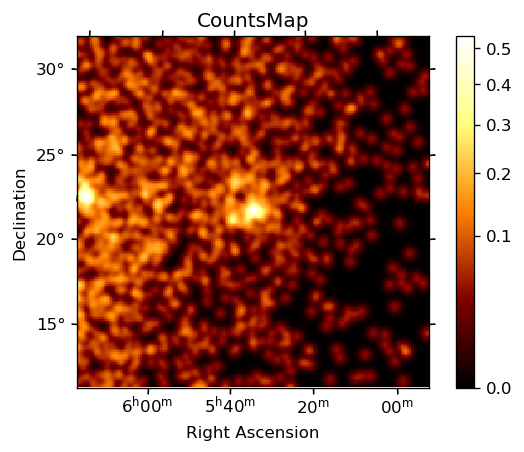

In [65]:
fig = plt.figure(figsize=(6, 3.8), dpi=120)
vmin, vmax = np.percentile(
    dataset.counts.sum_over_axes().smooth("0.1 deg").data, 
    [5, 99.9]
)
ax = dataset.counts.sum_over_axes().smooth("0.2 deg").plot(
    vmin=vmin, vmax=vmax, add_cbar=True, stretch="sqrt",
)
ax.set_title('CountsMap')

/home/chaitanya.priyadarsh/anaconda3/envs/gammapy-dev/lib/python3.8/site-packages/regions/shapes/rectangle.py:208: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  return Rectangle(xy=xy, width=width, height=height,


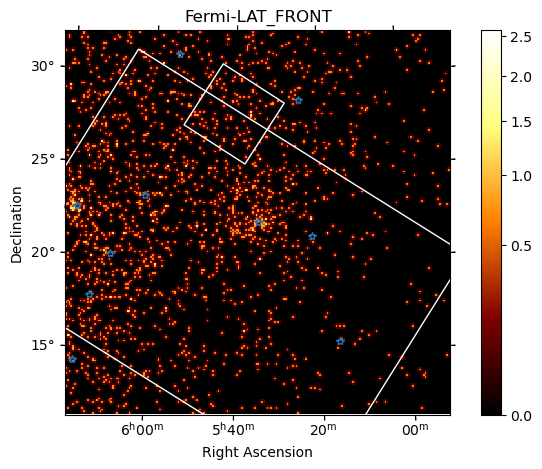

In [66]:
plt.figure(figsize=(8, 5))
axs = plt.subplot(111, projection=dataset.counts.geom.wcs)

#for ax, d in zip(axs, dataset):
dataset.counts.sum_over_axes().smooth(0.05 * u.deg).plot(
    ax=axs, stretch="sqrt", add_cbar=True, cmap="afmhot"
)
dataset.models.plot_regions(ax=axs, color="white")
axs.set_title(dataset.name)

plt.show()

In [67]:
dataset.exposure.plot_interactive(add_cbar=True)

interactive(children=(SelectionSlider(continuous_update=False, description='Select energy_true:', layout=Layou…

<AxesSubplot:xlabel='True Energy [MeV]', ylabel='Containment radius (deg)'>

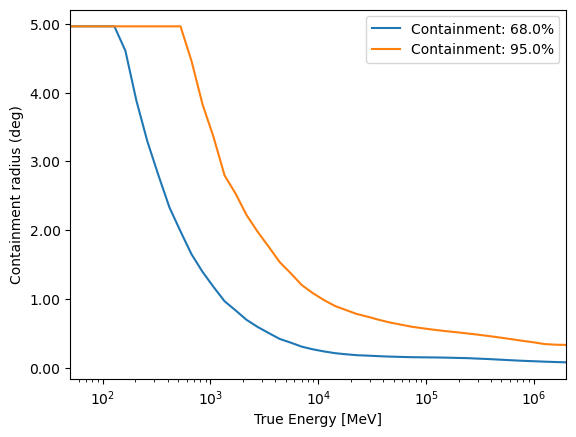

In [68]:
dataset.psf.plot_containment_radius_vs_energy()

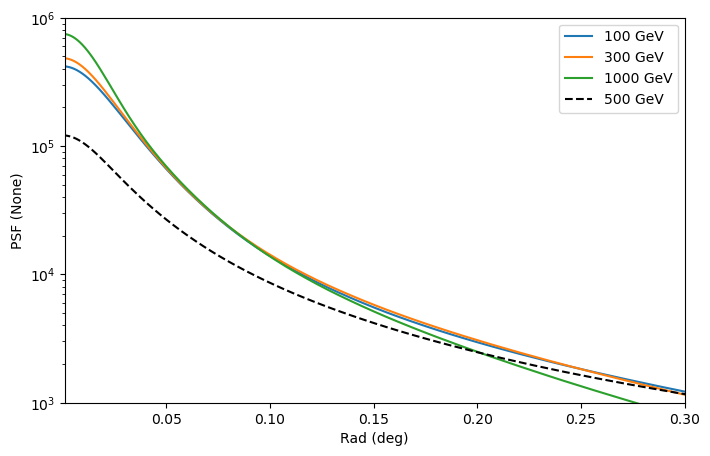

In [69]:
plt.figure(figsize=(8, 5))

energy = [100, 300, 1000] * u.GeV
dataset.psf.plot_psf_vs_rad(energy_true=energy)

spectrum = PowerLawSpectralModel(index=1.25)
psf_mean = dataset.psf.to_image(spectrum=spectrum)
psf_mean.plot_psf_vs_rad(c="k", ls="--", energy_true=[500] * u.GeV)

plt.xlim(1e-3, 0.3)
plt.ylim(1e3, 1e6)
plt.legend()

In [70]:
radius = dataset.psf.containment_radius(energy_true=1 * u.TeV, fraction=0.95)
print(radius)

[0.3663111] deg


<AxesSubplot:xlabel='True Energy [MeV]', ylabel='Energy [MeV]'>

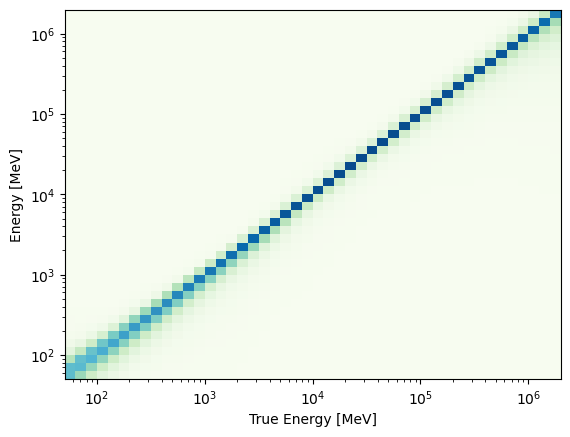

In [71]:
plt.figure()
edisp_kernel = dataset.edisp.get_edisp_kernel()
edisp_kernel.plot_matrix()

<WCSAxesSubplot:xlabel='Right Ascension', ylabel='Declination'>

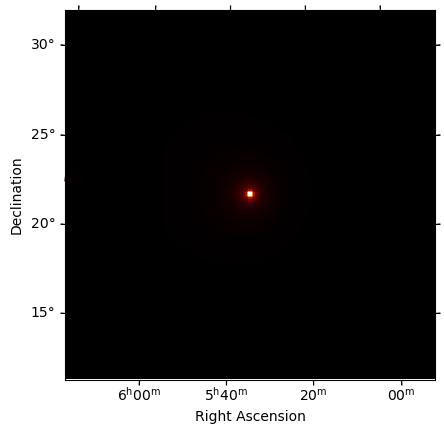

In [72]:
plt.figure()
npred = dataset.npred()
npred.sum_over_axes().plot()